here , we will learn to perform positional encoding.so what is positional encoding?


Positional encoding is a technique used in models like Transformers to provide positional information to the model by adding position-dependent signals to word embeddings, allowing the model to incorporate the order of words in the input sequence.


and we use sin and cos for positional encoding

In [1]:
import torch
import torch.nn as nn
import math
max_seq_len=10 #max no. of words
d_model=6  #output dimension  #usually its 512, but here its 6 just for basic

soo, why do we use sin and cos for positional encoding??

*   perodicity (repeat after certain interval)
*   constrained values(value will be within -1 to 1 and bounded)
*   easy to extrapolate for long sequences





and here is the forumla



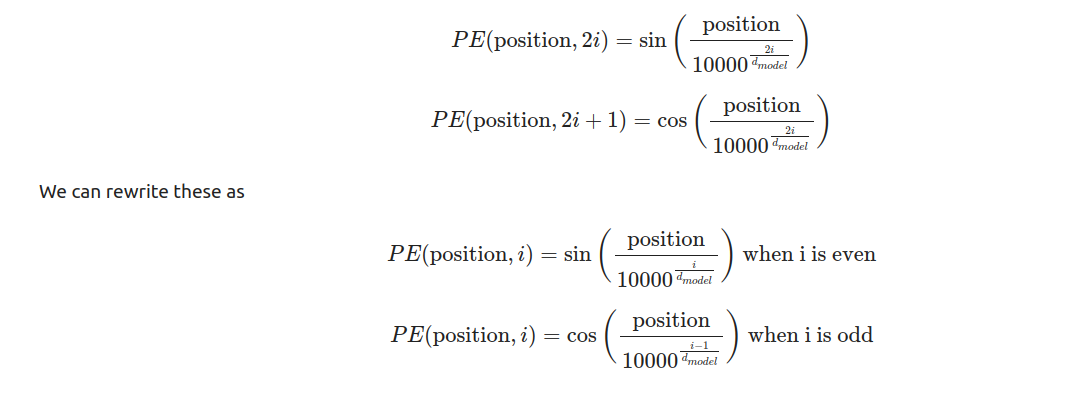

In [10]:
even_i=torch.arange(0,d_model,2).float()
even_i

tensor([0., 2., 4.])

In [14]:
even_denominator=torch.pow(10000,even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [15]:
odd_i=torch.arange(1,d_model,2).float()
odd_i

tensor([1., 3., 5.])

insted of using different formula, lets use same for both

In [16]:
even_denominator = torch.pow(10000, (odd_i - 1)/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])



even_denominator and odd_denominator are the same! So we can just do one of these actions and call the resulting variable denominator



In [17]:
denominator = even_denominator

now lets calculate the position

In [18]:
position=torch.arange(max_seq_len,dtype=torch.float).reshape(max_seq_len,1)

In [19]:
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

now lets calculate even_pe and odd_pe

In [21]:
even_pe=torch.sin(position/denominator)
odd_pe=torch.cos(position/denominator)

In [22]:
even_pe,even_pe.shape

(tensor([[ 0.0000,  0.0000,  0.0000],
         [ 0.8415,  0.0464,  0.0022],
         [ 0.9093,  0.0927,  0.0043],
         [ 0.1411,  0.1388,  0.0065],
         [-0.7568,  0.1846,  0.0086],
         [-0.9589,  0.2300,  0.0108],
         [-0.2794,  0.2749,  0.0129],
         [ 0.6570,  0.3192,  0.0151],
         [ 0.9894,  0.3629,  0.0172],
         [ 0.4121,  0.4057,  0.0194]]),
 torch.Size([10, 3]))

In [23]:
odd_pe,odd_pe.shape

(tensor([[ 1.0000,  1.0000,  1.0000],
         [ 0.5403,  0.9989,  1.0000],
         [-0.4161,  0.9957,  1.0000],
         [-0.9900,  0.9903,  1.0000],
         [-0.6536,  0.9828,  1.0000],
         [ 0.2837,  0.9732,  0.9999],
         [ 0.9602,  0.9615,  0.9999],
         [ 0.7539,  0.9477,  0.9999],
         [-0.1455,  0.9318,  0.9999],
         [-0.9111,  0.9140,  0.9998]]),
 torch.Size([10, 3]))

In [24]:
#now lets stack these 2 on top of each other
stacked=torch.stack([even_pe,odd_pe],dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [25]:
stacked

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]]])

In [26]:
positional_encoding=torch.flatten(stacked,start_dim=1,end_dim=2)
positional_encoding.shape

torch.Size([10, 6])

In [27]:
positional_encoding

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

#now lets combine all the things we did above in a class

In [29]:
class PositionalEncoding(nn.Module):
  def __init__(self,max_seq_len,d_model):
    super().__init__()
    self.max_seq_len=max_seq_len
    self.d_model=d_model

  def forward(self):
    even_i=torch.arange(0,self.d_model,2).float()
    denominator=torch.pow(10000,even_i/self.d_model)

    position=torch.arange(self.max_seq_len,dtype=torch.float).reshape(self.max_seq_len,1)

    even_pe=torch.sin(position/denominator)
    odd_pe=torch.cos(position/denominator)

    stacked=torch.stack([even_pe,odd_pe],dim=2)
    positional_encoding=torch.flatten(stacked,start_dim=1,end_dim=2)

    return positional_encoding


In [31]:
PE=PositionalEncoding(d_model=d_model,max_seq_len=max_seq_len)
PE.forward()


tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])